In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
import tensorflow 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Activation,LeakyReLU
from tensorflow.keras.activations import sigmoid,softmax,relu
from tensorflow.keras.optimizers import Adagrad,Adam,Adadelta,Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imutils import paths

In [3]:
data_dir = "D:\\Finetuning techniques\\new\\archive\\Data"

In [4]:
train_dir = data_dir + '\\train'

In [17]:
test_dir = data_dir + '\\test'

In [9]:
import os 

In [10]:
train_dir = data_dir+"/train"
os.listdir(train_dir)

['COVID19', 'NORMAL', 'PNEUMONIA']

In [11]:
len(os.listdir(train_dir+"/PNEUMONIA"))

3418

In [12]:
generator = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255,
)

In [14]:
average_image_size = (400,400,3)

In [15]:
train_generator = generator.flow_from_directory (
    train_dir,
    target_size=average_image_size[:2],
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
)

Found 5144 images belonging to 3 classes.


In [18]:
test_generator = generator.flow_from_directory (
    test_dir,
    target_size=average_image_size[:2],
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
)

Found 1288 images belonging to 3 classes.


In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=6)

In [21]:
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same", kernel_size = (2,2), strides = (2,2), activation = "relu", input_shape = average_image_size))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32, padding = "same", kernel_size = (2,2), strides = (2,2), activation = "relu", input_shape = average_image_size))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, padding = "same", kernel_size = (2,2), strides = (2,2), activation = "relu", input_shape = average_image_size))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 132, activation = "relu"))
model.add(Dense(units = 60, activation = "relu"))
model.add(Dense(units = 3, activation = "softmax"))


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [24]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [26]:
model.fit_generator(train_generator, validation_data=test_generator, epochs=10, callbacks=[stop])

C:\Users\korla\anaconda3\envs\TF\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
161/161 [==============================] - 392s 2s/step - loss: 0.5708 - accuracy: 0.7599 - val_loss: 0.3626 - val_accuracy: 0.8595
Epoch 2/10
161/161 [==============================] - 289s 2s/step - loss: 0.3665 - accuracy: 0.8484 - val_loss: 0.3560 - val_accuracy: 0.8812
Epoch 3/10
161/161 [==============================] - 289s 2s/step - loss: 0.3125 - accuracy: 0.8828 - val_loss: 0.2933 - val_accuracy: 0.8998
Epoch 4/10
161/161 [==============================] - 290s 2s/step - loss: 0.3019 - accuracy: 0.8824 - val_loss: 0.3080 - val_accuracy: 0.8773
Epoch 5/10
161/161 [==============================] - 291s 2s/step - loss: 0.2711 - accuracy: 0.8948 - val_loss: 0.2924 - val_accuracy: 0.8952
Epoch 6/10
161/161 [==============================] - 290s 2s/step - loss: 0.2550 - accuracy: 0.9057 - val_loss: 0.2713 - val_accuracy: 0.9146
Epoch 7/10
161/161 [==============================] - 299s 2s/step - loss: 0.2639 - accuracy: 0.8983 - val_loss: 0.2234 - val_accuracy: 0.9177

In [27]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
train_loss = model.history.history['loss']
train_loss

[0.5707578063011169,
 0.36654728651046753,
 0.3125104010105133,
 0.30188411474227905,
 0.27113476395606995,
 0.254986435174942,
 0.263915479183197,
 0.2432454526424408,
 0.23362059891223907,
 0.23231734335422516]

In [29]:
test_loss = model.history.history['val_loss']
test_loss

[0.3626144230365753,
 0.35597074031829834,
 0.2933334410190582,
 0.30798566341400146,
 0.29244133830070496,
 0.2712501585483551,
 0.22340279817581177,
 0.2444991171360016,
 0.24277204275131226,
 0.22026291489601135]

In [30]:
train_acc = model.history.history['accuracy']
train_acc

[0.7599144577980042,
 0.8483670353889465,
 0.8827760219573975,
 0.8823872208595276,
 0.8948289155960083,
 0.9057154059410095,
 0.8983281254768372,
 0.9088258147239685,
 0.9146578311920166,
 0.9109642505645752]

In [31]:
test_acc = model.history.history['val_accuracy']
test_acc

[0.8594720363616943,
 0.8812111616134644,
 0.8998447060585022,
 0.8773291707038879,
 0.8951863646507263,
 0.9145962595939636,
 0.9177018404006958,
 0.9208074808120728,
 0.9208074808120728,
 0.9200310707092285]

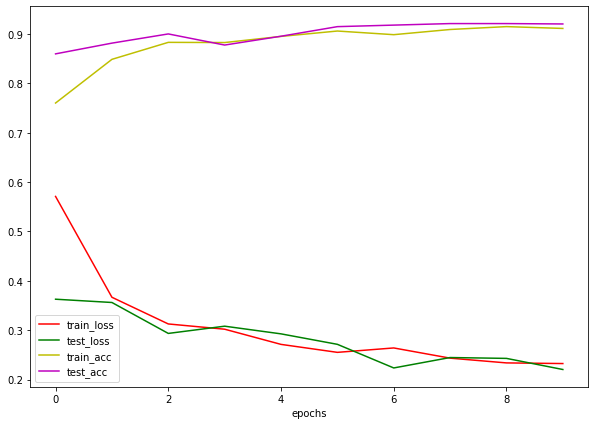

In [37]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(10),train_loss,color='r',label='train_loss')
plt.plot(np.arange(10),test_loss,color='g',label='test_loss')
plt.plot(np.arange(10),train_acc,color='y',label='train_acc')
plt.plot(np.arange(10),test_acc,color='m',label='test_acc')
plt.legend()
plt.xlabel('epochs')
plt.show()

### validation Report 

In [38]:
y_test_pred = model.predict(test_generator)

In [39]:
y_test_pred[:10]

array([[0.60522896, 0.33975655, 0.05501446],
       [0.96883863, 0.01486744, 0.01629392],
       [0.8381013 , 0.02121391, 0.14068484],
       [0.9038724 , 0.02830094, 0.06782667],
       [0.52928346, 0.36905146, 0.10166519],
       [0.9406846 , 0.01867185, 0.04064348],
       [0.81980413, 0.04829762, 0.13189833],
       [0.98812973, 0.00866251, 0.0032078 ],
       [0.69662106, 0.03800153, 0.2653773 ],
       [0.96228975, 0.02026094, 0.01744935]], dtype=float32)

In [40]:
y_test_pred = np.argmax(y_test_pred,axis = 1)

In [41]:
len(y_test_pred)

1288

In [42]:
len(test_generator.classes)

1288

In [43]:
test_generator.classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
y_test_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [46]:
accuracy_score(test_generator.classes,y_test_pred)

0.9161490683229814

In [47]:
confusion_matrix(test_generator.classes,y_test_pred)

array([[107,   5,   4],
       [  1, 282,  34],
       [  7,  57, 791]], dtype=int64)

In [57]:
print(classification_report(test_generator.classes,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       116
           1       0.82      0.89      0.85       317
           2       0.95      0.93      0.94       855

    accuracy                           0.92      1288
   macro avg       0.90      0.91      0.91      1288
weighted avg       0.92      0.92      0.92      1288



### checking with real data 

In [58]:
import cv2

In [59]:
labels = ['covid','normal','phenomia']

In [67]:
from tensorflow.keras.preprocessing import image

In [68]:
def fun(path):
    
    img = cv2.imread(path)
    im_resize = cv2.resize(img,(400,400),interpolation=cv2.INTER_LINEAR)
    plt.imshow(cv2.cvtColor(im_resize,cv2.COLOR_BGR2RGB))
    
    image_pred = image.load_img(path,target_size=average_image_size)
    image_pred = image.img_to_array(image_pred)
    a = np.expand_dims(image_pred,axis = 0)
    
    result = model.predict(a)
    print(result)
    
    q = np.argmax(result,axis = 1)
    print(q)
    print(labels[q[0]])
    
    

[[0. 1. 0.]]
[1]
normal


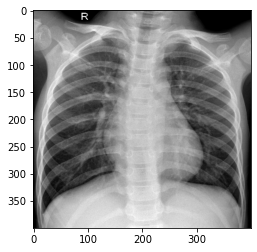

In [69]:
fun('D:\\Finetuning techniques\\new\\archive\\Data\\test\\NORMAL\\1.jpg')

[[1. 0. 0.]]
[0]
covid


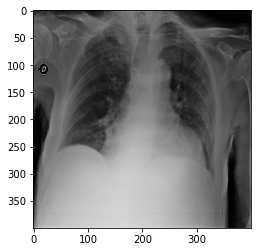

In [71]:
fun('D:\\Finetuning techniques\\new\\archive\\Data\\test\\COVID19\\3.jpg')

[[1. 0. 0.]]
[0]
covid


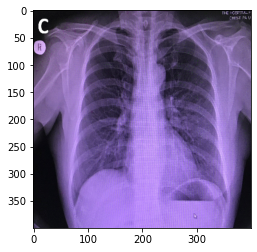

In [77]:
fun('D:\\Finetuning techniques\\new\\archive\\Data\\test\\COVID19\\20.jpg')

[[0. 1. 0.]]
[1]
normal


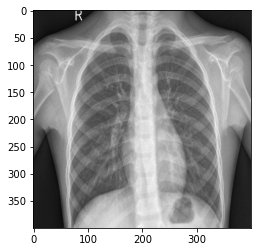

In [79]:
fun('D:\\Finetuning techniques\\new\\archive\\Data\\data\\normal\\Normal(0).jpg')

[[0. 0. 1.]]
[2]
phenomia


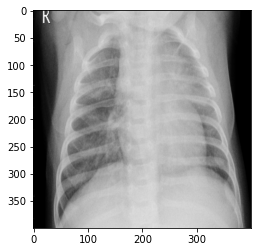

In [81]:
fun('D:\\Finetuning techniques\\new\\archive\\Data\\test\\PNEUMONIA\\2.jpg')

[[0. 0. 1.]]
[2]
phenomia


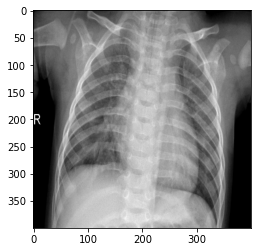

In [82]:
fun('D:\\Finetuning techniques\\new\\archive\\Data\\test\\PNEUMONIA\\3.jpg')

In [15]:
a = '13:05'
int(a[-1])

5

In [11]:
c = int(b)
c

13

In [12]:
d = 13 * 60
f = d + 5
f

785

In [13]:
60 * 13

780

In [17]:
a = 44
b = a.split()
b

AttributeError: 'int' object has no attribute 'split'